# Holt-Winters time series forecasting

Integrantes: Maria Paula Malavet, Juliette Martínez Bermúdez, Alejandra Tovar Rodríguez.


Usando el instructivo de ExponentialSmoothing

https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing

Verificamos que estén instalados los paquetes necesarios.

pip install pandas

pip install numpy

pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Importamos los datos de demanda.

In [2]:
df = pd.read_excel (r'/Users/juliemac/Desktop/Documents/University/2020-3/Producción/Ejercicios/DemandaPython.xlsx')
df

,Demanda
0,382
1,613
2,866
3,616
4,650
...,...
145,2221
146,1997
147,1959
148,2211


Se realiza el modelo Holt winters, para este caso tomamos toda la información disponible de demanda, seleccionamos el trend y seasonal que mejor resultado genera al observar la gráfica con la predicción. Probamos distintos números para "seasonal_periods" y seleccionamos el que genera menor MAD.

0       536.090676
1       577.707916
2       585.428715
3       576.916187
4       618.975026
          ...     
154    2137.730323
155    2059.058209
156    2107.488348
157    2145.231585
158    2171.671259
Length: 159, dtype: float64

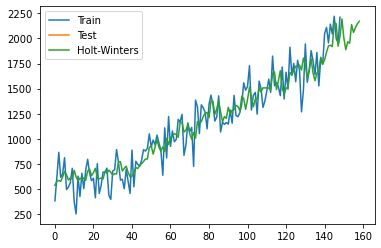

In [3]:
df.index.freq = 'MS'
train, test = df.iloc[:149, 0], df.iloc[149:, 0]
model = ExponentialSmoothing(train,trend='additive', seasonal='mul', seasonal_periods=16).fit()
pred = model.predict(start=0, end=158)

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
pred

A continuación los valores de las predicciones para el periodo 151-159.

In [4]:
pred.iloc[150:]

150    2003.477868
151    1887.642895
152    1966.956731
153    1951.777038
154    2137.730323
155    2059.058209
156    2107.488348
157    2145.231585
158    2171.671259
dtype: float64

A continuación los valores de predicción hasta el periodo conocido.

In [5]:
pred2=pred.copy()

pred2=pred2.iloc[:150]
pred2

0       536.090676
1       577.707916
2       585.428715
3       576.916187
4       618.975026
          ...     
145    2157.210849
146    2145.875216
147    1921.886488
148    2022.947828
149    2193.798139
Length: 150, dtype: float64

In [6]:
result = pd.concat([df, pred2], axis=1, sort=False)

A continuación la tabla con los valores de demanda y pronóstico para cada periodo.

In [7]:
result.columns = ['Demanda', 'Pronóstico']
result

,Demanda,Pronóstico
0,382,536.090676
1,613,577.707916
2,866,585.428715
3,616,576.916187
4,650,618.975026
...,...,...
145,2221,2157.210849
146,1997,2145.875216
147,1959,1921.886488
148,2211,2022.947828


In [8]:
result['absError'] = abs(result['Pronóstico']-result['Demanda'])
result

,Demanda,Pronóstico,absError
0,382,536.090676,154.090676
1,613,577.707916,35.292084
2,866,585.428715,280.571285
3,616,576.916187,39.083813
4,650,618.975026,31.024974
...,...,...,...
145,2221,2157.210849,63.789151
146,1997,2145.875216,148.875216
147,1959,1921.886488,37.113512
148,2211,2022.947828,188.052172


Posteriormente, calculamos el DAM.

In [9]:
result['absError'].mean()

120.23073358192116